<a href="https://colab.research.google.com/github/akhilganji0812/Introvert_vs_Extrovert_Personality_Prediction_Using_Machine_Learning/blob/main/Copy_of_Introvert_vs_Extrovert_Personality_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING REQUIRED HEADER FILES AND LIBRARIES

In [ ]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical computations and array handling
import numpy as np

# Import matplotlib.pyplot for data visualization and plotting graphs
import matplotlib.pyplot as plt

# Import seaborn library for advanced statistical data visualization
import seaborn as sb

# IMPORTING THE DATASET AND CHECKING FOR MISSING VALUES

In [ ]:
# Read CSV data from the given Google Drive URL into a pandas DataFrame named 'data'
data = pd.read_csv('https://drive.google.com/uc?id=1RVLji8RAZQCkxNSooJS0Y7aK7AdmGAvq')

# Check and sum the number of missing (null) values in each column of the DataFrame
data.isnull().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


# BAR GRAPH COMPARING EXTROVERTS AND INTROVERTS

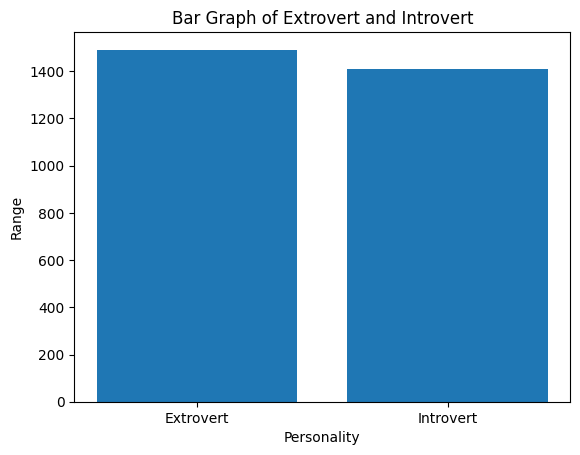

In [ ]:
# Initialize counters for Extrovert and Introvert categories
arr1 = 0
arr2 = 0

# Select the last column as the target variable and convert to a NumPy array
y = data.iloc[:, -1].values

# Loop through each item in y to count occurrences of 'Extrovert' and others (assumed 'Introvert')
for i in y:
    if i == 'Extrovert':
        arr1 += 1
    else:
        arr2 += 1

# Prepare values and labels for the bar plot
values = [arr1, arr2]
labels = ['Extrovert', 'Introvert']

# Create a bar plot with the counts for each personality type
plt.bar(labels, values)

# Add title and axis labels to the plot for clarity
plt.title('Bar Graph of Extrovert and Introvert')
plt.xlabel('Personality')
plt.ylabel('Range')

# Display the plot
plt.show()

# VISUALIZATION OF THE ENTIRE DATASET

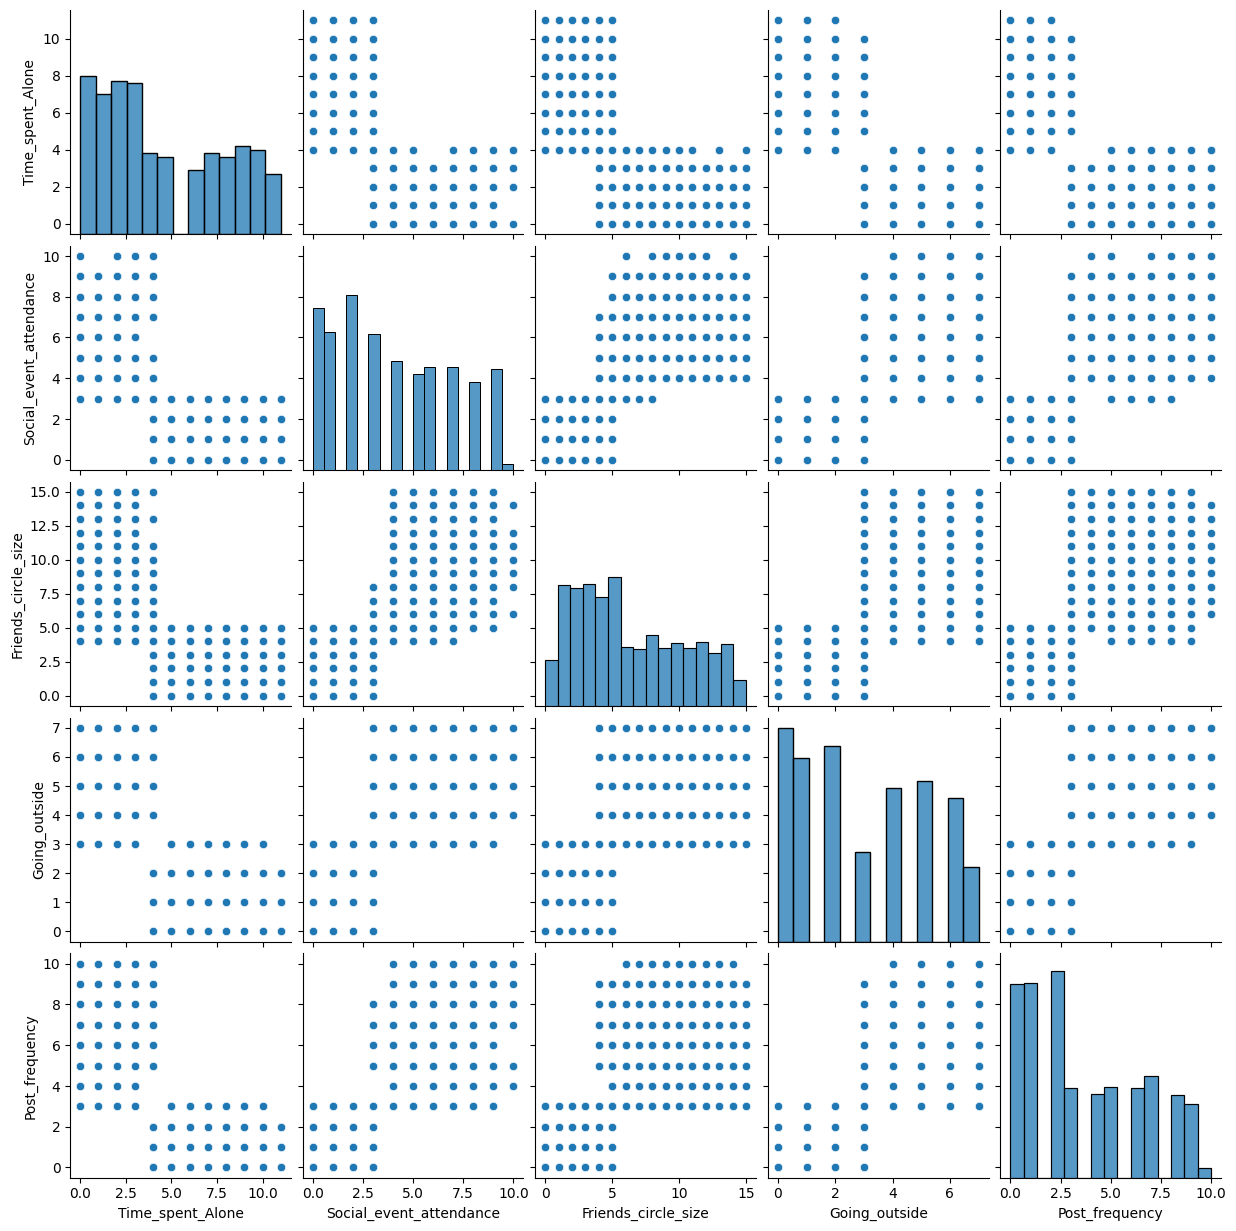

In [ ]:
# Create pairwise scatterplots for the specified columns in the DataFrame 'data'
sb.pairplot(data[['Time_spent_Alone', 'Social_event_attendance', 'Friends_circle_size', 'Going_outside', 'Post_frequency']])

# Display the generated pairplot
plt.show()

# SEPARATING THE FEATURE VARIABLES FROM THE TARGET VARIABLE

In [ ]:
# Select all columns except the last one as features and convert to a NumPy array
X = data.iloc[:, :-1].values

# Select the last column as the target variable and convert to a NumPy array
y = data.iloc[:, -1].values

# HANDLING THE MISSING VALUES IN THE DATASET

In [ ]:
# Import SimpleImputer class from sklearn to handle missing data
from sklearn.impute import SimpleImputer

# Define the list of column indices where missing values need to be imputed
w = [0, 2, 3, 5, 6]

# Create an imputer object that replaces missing values (np.nan) with the mean of the column
q = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the selected columns of X to learn the mean values
q.fit(X[:, w])

# Transform the selected columns by replacing missing values with the computed mean
X[:, w] = q.transform(X[:, w])

# CONVERTING CATEGORICAL STRING VALUES INTO NUMERICAL VALUES IN FEATURE VARIABLES

In [ ]:
# Import LabelEncoder to convert categorical labels into numeric form
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
t = LabelEncoder()

# Encode categorical values in the second column of X into numeric labels
X[:, 1] = t.fit_transform(X[:, 1])

# Encode categorical values in the fifth column of X into numeric labels
X[:, 4] = t.fit_transform(X[:, 4])

# Encode target variable y into numeric labels
y = t.fit_transform(y)

# HANDLING MISSING VALUES IN THE NEWLY CONVERTED NUMERICAL DATA FROM CATEGORICAL STRINGS

In [ ]:
# Import SimpleImputer again to handle missing data (redundant if already imported)
from sklearn.impute import SimpleImputer

# Define the list of column indices where missing values need to be imputed (columns 1 and 4)
w = [1, 4]  # index numbers of array

# Create an imputer object that replaces missing values (np.nan) with the mean of the column
q = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the selected columns of X to learn the mean values
q.fit(X[:, w])

# Transform the selected columns by replacing missing values with the computed mean
X[:, w] = q.transform(X[:, w])

# SPLITTING THE DATA INTO TRAINING AND TESTING SETS

In [ ]:
# Import train_test_split function to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Split X and y into training and testing sets with 20% data reserved for testing
# random_state=0 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# BUILDING AND TRAINING THE MODEL

In [ ]:
# Import KNeighborsClassifier for classification using K-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier model with 5 nearest neighbors
model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model using the training data
model.fit(X_train, y_train)

KNeighborsClassifier()

# TESTING THE MODEL AND BUILDING THE CONFUSION MATRIX

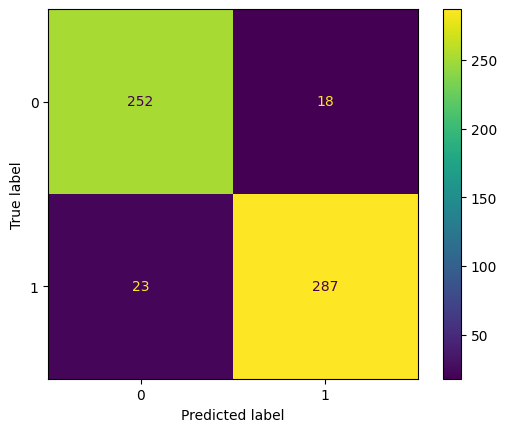

In [ ]:
# Import functions to compute and display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Compute the confusion matrix by comparing true labels with predicted labels on test data
cm = confusion_matrix(y_test, model.predict(X_test))

# Display the confusion matrix as a plot
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# ACCURACY SCORE OF THE TRAINED MODEL

In [ ]:
# Import accuracy_score to evaluate the model's prediction accuracy
from sklearn.metrics import accuracy_score

# Calculate and print the accuracy of the model on the test data
print(accuracy_score(y_test, model.predict(X_test)))

0.9293103448275862
